
Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - Fundamentals of Computer Vision
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **PRELIM EXAMINATION**
**Name** | Dela Cruz, Irish & Gullas, Rainer
**Section** | CPE32S3
**Date Performed**: | 02/28/2024
**Date Submitted**: | 03/06/2024
**Instructor**: | Engr. Roman M. Richard

<hr>




# OBJECTIVES

In this exam, you will show the application of the following algorithms:

**Part 1: Linear Regression**
*  Singular Linear Regression
*  Multiple Linear Regression
*  Polynomial Linear Regression

**Part 2: Logistic Regression**

**Part 3: Decision Tress**

**Part 4: Random Forest**








# SCENARIO / BACKGROUND

In this exam, we will show each application of algorithms that listed above, including the datasets which contains the 2,516 entries.


 The tasked is to analyzed historical stock market data for the past 10 years to identify patterns and build predictive models for stock price movements.


 The goal is to develop models that can accurately predict wheter the stock price increase or decrease in the future based on various factors.



# REQUIRED RESOURCES

*   PC / Laptop with Internet Access
*   **Python libraries:** pandas, sklearn, IPython.display, numpy, and seaborn.
*  **Additonal application:** Graphviz
*  **Datafiles:** Meta Stock Price Technical Indicator.csv


# The datasets contain the following variables:






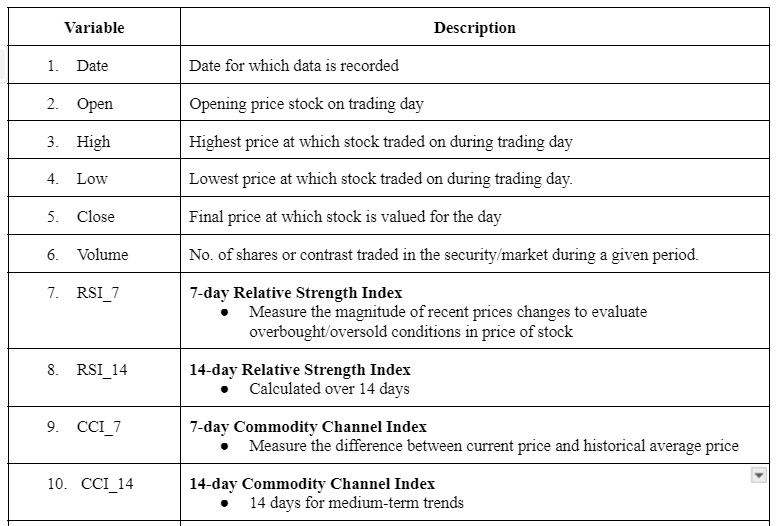

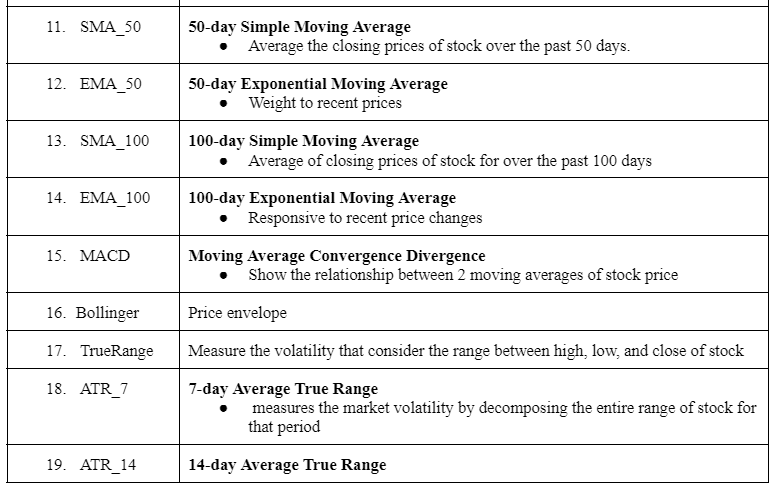

# Import the libraries and data


In [2]:
#importing the important libraries that needed in the study
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#load the Dataset and named as "stock"
stock = pd.read_csv("/content/Meta Stock Price Technical Indicators (10 Years).csv")

In [ ]:
#select the first 20 rows of the data
stock.head(20)

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2014-01-02,54.830002,55.220001,54.189999,54.709999,43195500,51.917475,58.077822,-64.312117,-13.517101,50.2818,50.740946,47.6654,46.914555,1.828901,53.2450,1.030002,1.652052,1.710739,54.560001
1,2014-01-03,55.020000,55.650002,54.529999,54.560001,38246200,50.604988,57.387622,-40.054734,-17.361246,50.3194,50.890719,47.8288,47.066897,1.687987,53.5420,1.120003,1.576045,1.668543,57.200001
2,2014-01-06,54.419998,57.259998,54.049999,57.200001,68852600,67.483917,65.221525,43.907749,42.364730,50.4254,51.138151,48.0306,47.268784,1.768947,53.9850,3.209999,1.809467,1.778647,57.919998
3,2014-01-07,57.700001,58.549999,57.220001,57.919998,77207400,70.672584,67.003189,150.620136,117.886980,50.5348,51.404115,48.2433,47.480966,1.869653,54.4840,1.349998,1.743829,1.748030,58.230000
4,2014-01-08,57.599998,58.410000,57.230000,58.230000,56682400,72.049420,67.768804,107.795942,101.415192,50.6604,51.671806,48.4600,47.695073,1.951977,54.9535,1.180000,1.663282,1.707456,57.220001
5,2014-01-09,58.650002,58.959999,56.650002,57.220001,92253300,61.139242,62.667059,67.348891,72.506466,50.8002,51.889389,48.6614,47.884774,1.913662,55.3020,2.309997,1.755670,1.750495,57.939999
6,2014-01-10,57.130001,58.299999,57.060001,57.939999,42449500,65.485896,64.706800,56.148766,68.897572,50.9710,52.126676,48.8627,48.085014,1.919270,55.7300,1.239998,1.682002,1.714031,55.910000
7,2014-01-13,57.910000,58.250000,55.380001,55.910000,63010900,47.872555,55.499705,-32.374938,0.494863,51.1090,52.275046,49.0377,48.240824,1.739855,55.9340,2.869999,1.851716,1.796600,57.740002
8,2014-01-14,56.459999,57.779999,56.099998,57.740002,37503600,59.366740,60.900791,-11.118995,38.260302,51.2596,52.489364,49.2319,48.429949,1.725443,56.1550,1.869999,1.854328,1.801843,57.599998
9,2014-01-15,57.980000,58.570000,57.270000,57.599998,33663400,58.220894,60.297824,47.470053,71.421641,51.4166,52.689787,49.4224,48.612501,1.683320,56.3445,1.300000,1.775138,1.765997,57.189999


In [ ]:
#Calculating the summary statistics of data
stock.describe()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,178.035517,180.328621,175.826359,178.129122,2.617010e+07,54.339039,54.047585,13.860957,21.786028,175.350939,175.391728,172.714407,172.828966,0.787792,177.025524,5.009948,4.998040,4.981088,178.245012
std,81.123720,82.200952,80.118216,81.166653,1.782460e+07,15.808831,11.486580,99.506607,107.431270,79.621484,79.101923,78.246631,77.120070,4.869274,80.479297,4.338035,3.045084,2.912425,81.198518
min,54.020000,54.939999,51.849998,53.529999,5.467500e+06,14.083263,21.934202,-233.333333,-422.479783,50.281800,50.740946,47.665400,46.914555,-29.046311,53.245000,0.529999,1.095919,1.276304,53.529999
25%,115.787498,117.452497,114.007502,115.565003,1.563175e+07,43.513651,46.359166,-68.969530,-57.372272,115.554749,115.484737,112.843875,112.552245,-0.881898,114.901500,2.087497,2.292068,2.379389,115.792499
50%,170.114998,172.110001,168.224998,170.245002,2.106275e+07,55.357801,54.679774,27.716116,35.250491,170.474200,170.871460,170.365500,171.015576,1.032127,169.461749,3.904995,4.305433,4.363978,170.264999
75%,220.297504,221.827499,216.492501,219.864994,3.022008e+07,66.148583,62.652629,95.153139,102.728473,210.956750,216.288210,203.539550,214.056316,2.855147,216.494625,6.619995,7.373164,7.530707,220.222496
max,381.679993,384.329987,378.809998,382.179993,2.323166e+08,93.579562,86.065371,233.333333,418.499830,363.754401,362.957061,351.029901,347.213736,15.623524,373.422003,87.250000,22.274682,16.665167,382.179993


In [ ]:
#Provides the summary of Dataframe.
#Including the index, columnss, data type, and non-null values.
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            2516 non-null   object 
 1   open            2516 non-null   float64
 2   high            2516 non-null   float64
 3   low             2516 non-null   float64
 4   close           2516 non-null   float64
 5   volume          2516 non-null   int64  
 6   rsi_7           2516 non-null   float64
 7   rsi_14          2516 non-null   float64
 8   cci_7           2516 non-null   float64
 9   cci_14          2516 non-null   float64
 10  sma_50          2516 non-null   float64
 11  ema_50          2516 non-null   float64
 12  sma_100         2516 non-null   float64
 13  ema_100         2516 non-null   float64
 14  macd            2516 non-null   float64
 15  bollinger       2516 non-null   float64
 16  TrueRange       2516 non-null   float64
 17  atr_7           2516 non-null   f

In [ ]:
#Checking if there's a missing or null values in Dataframe.
#isnull() and sum() calculates the total number of missing values for each column.
stock.isnull().sum()

date              0
open              0
high              0
low               0
close             0
volume            0
rsi_7             0
rsi_14            0
cci_7             0
cci_14            0
sma_50            0
ema_50            0
sma_100           0
ema_100           0
macd              0
bollinger         0
TrueRange         0
atr_7             0
atr_14            0
next_day_close    0
dtype: int64

# Analysis
Once there's missing values the statistic analsyis can leads to inaccurate results and predictions. That's why we check if there's a missing value above to fill the missing values to ensure that the analysis will be based on realible information. Also, there's algorithms cannot handle missing values and produces errors.


<ipython-input-25-d23ea36618d7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stock.corr(),  annot= True, cmap='coolwarm')


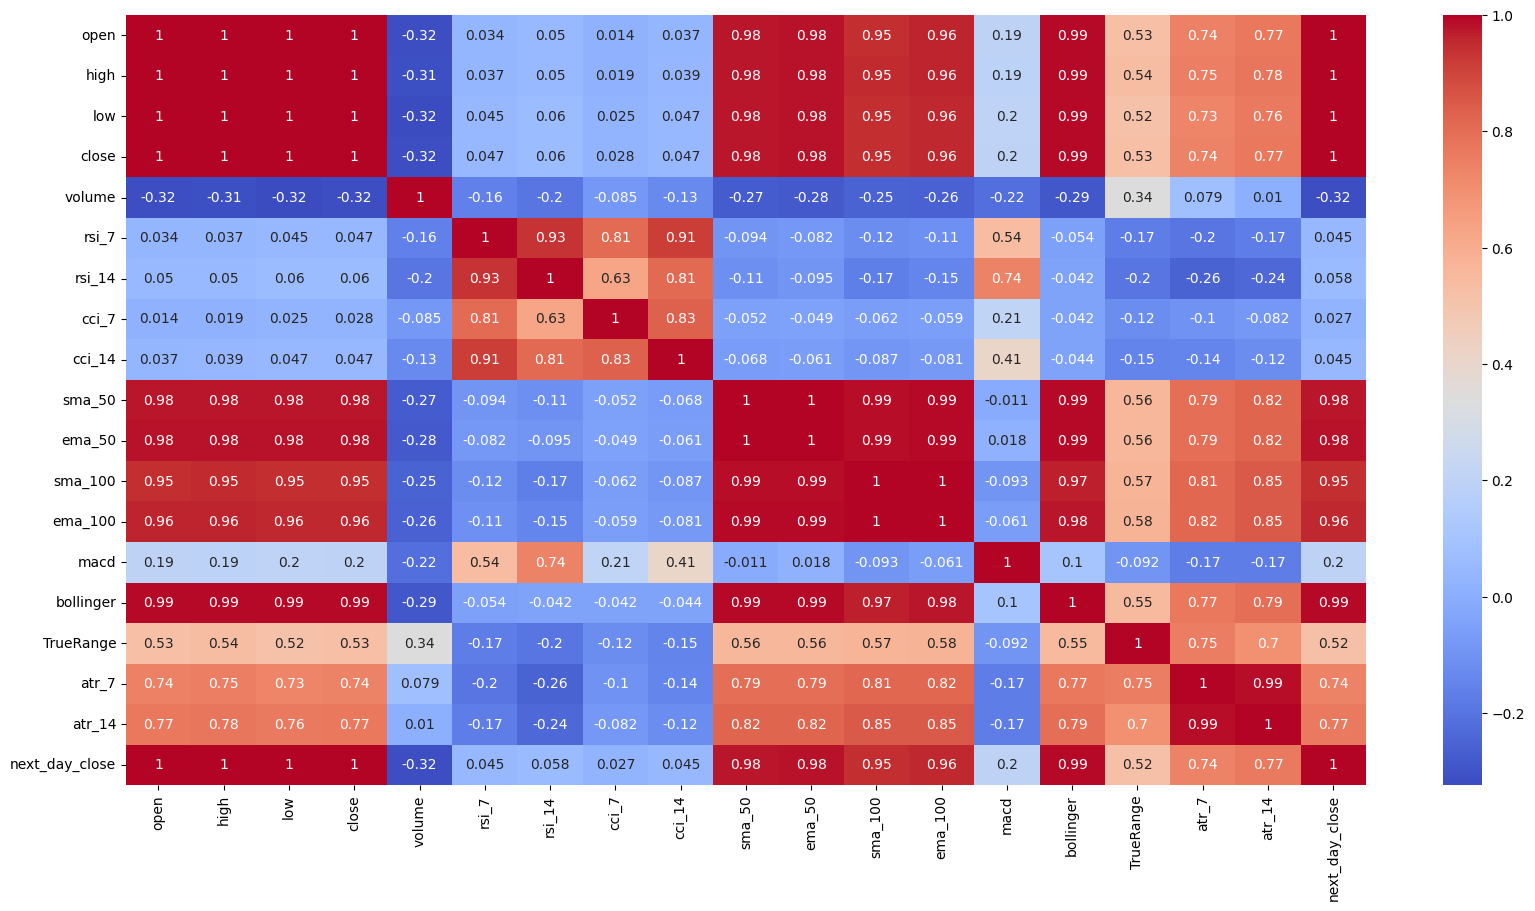

In [ ]:
#importing seaborn for better visualization with color palettes that looks professional
import seaborn as sns
import matplotlib.pyplot as plt

#annotation - used to display actual values by each cell
#color map - 'coolwarm' for better visualization
plt.figure(figsize=(20,10))
sns.heatmap(stock.corr(),  annot= True, cmap='coolwarm')
plt.show()

# Analysis
We used heatmap with coolwarm tone to easily visualized the correlation coefficient of the data that indicates the relationship between 2 or more variables if they are closely related to each other.

Here in the visual aids, when the diagonal indicate as 1 it signifies a perfect positive correlation. The independent variables (open, high, low, close) have a perfect positibe correlation with dependent variable (next_day_close) that can used to predict or explain the values with high certainty.

# Part 1: Linear Regression
In this part of exam, we will build and evaluate 3 types ofLinear Regression: **Singular Regression, Multiple Regression, Polynomial Regression**. These models will be trained on labeled dataset containing technical indicator for stock prices over the past 10 years.

Our goal is to predict the classification of Meta Stock Price Movements from 2014 - 2023 based on indicators.



# Singular Linear Regression
Statistical method used to model relationship between dependent variable (target or response) and independent variables (predictors or features). It assumes if there's a linear relationship between the independent and dependent variables.

Number of features: 19
Number of feature importances: 4


Text(0, 0.5, 'Feature')

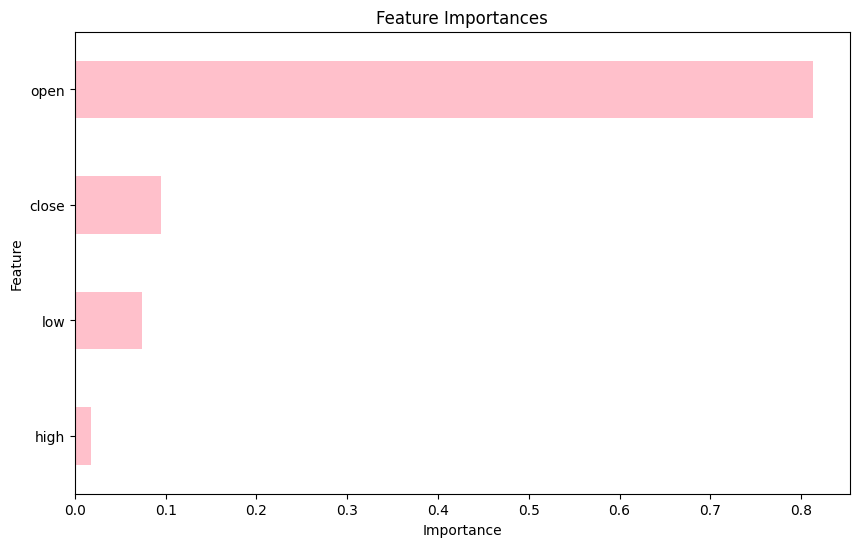

In [ ]:
#Column name
feature_names = ['open','high', 'low', 'close', 'volume', 'rsi_7', 'rsi_14', 'cci_7', 'cci_14','sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd', 'bollinger', 'TrueRange', 'atr_7', 'atr_14', 'next_day_close']

#Display the Feature name and important variables
print("Number of features:", len(feature_names))
print("Number of feature importances:", len(feature_importances))

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
ax = model_ranks.plot(kind='barh', color='pink')

# Set plot title and labels
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

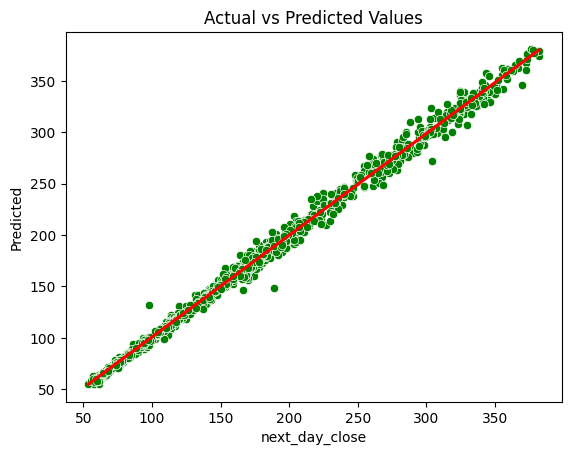

In [ ]:
import seaborn as sns

# Define predictors and target variable
X = stock[['open']]  # Independent variables
y = stock['next_day_close']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=23)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')

# Plot regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

# Analysis

We can visually assess the performance of linear regression model in predicting the 'next_day_closing' prices based on the opening prices. The points are closely align along diagonal line which indicates that the model's prediction closely match to actual values.


# Evaluate the model (Singular Linear Regression)

In [ ]:
#Computation for MSE and R-squared score
mse = mean_squared_error(y_test, y_pred) #ave sqr diff. between actual and predicted values
r_squared = r2_score(y_test, y_pred) #measure the proportion of variance in x and y

print("Mean Squared Error:", mse)
print("R-squared Score:", r_squared)

Mean Squared Error: 27.762230502330063
R-squared Score: 0.995662789441985


# Analysis
MSE is approximately 27.76 which is low value indicating that the model's prediction are close to actual values on average, which suggest a good accuracy.

The ranges of r2-score from 0 to 1, the r-squared score of the data was 0.996 closes to 1. Which suggest that 99.6% of independent variables in model are effective in explaining the variation in dependent variable.

**Note:** Closes to 1 means a perfect fit for the variability of response data around it mean

# Multi-linear Regression
Statistical technique used to analyzed relationship between two or more independent variables and dependent variables by fitting a linear equation to observed data.

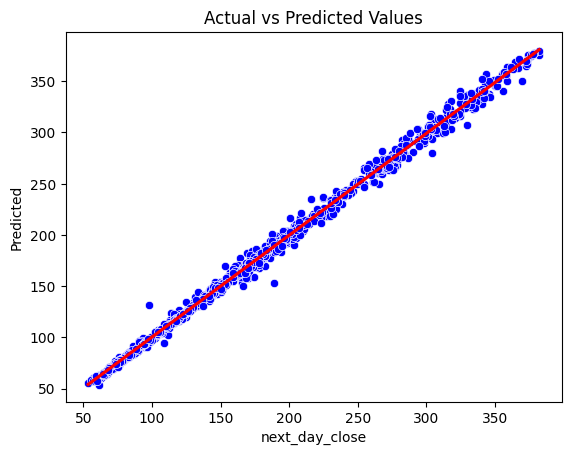

In [18]:
import seaborn as sns

# Define predictors and target variable
X = stock[['open', 'high', 'low', 'close']]  # Independent variables
y = stock['next_day_close']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=23)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')

# Plot regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

# Analysis

The points closely follow the red line, which suggests that the model's prediction are accurate and have a strong linear relationship between the independent variable (open, high, low, close) and dependent variable (next_day_close)

Note: If the points from tigh cluster around the regression line, it indicates that the model's prediction closely match the actual values and model capturing the patterns in data effectively.

# Evaluate the model (Multi-linear Regression

In [ ]:
# Calculation of MSE and R2-score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r_squared)

Mean Squared Error: 19.765984763393266
R-squared Score: 0.9969120190901752


# Analysis

The MSE is approximately 19.77 - low value which means the predicted values are close to the actual values. While the r2-score is equivalent to 0.997 or 99.7% which explains the model effectively captures the relationship of independent and dependent variable as evidenced by the high R-squared and low MSE.


# Polynomial Regression

Regression analysis used to model the relationship between a dependent variable and one or more independent variable by fitting the polynomial function to observed data.

Note: Polynomial Regression fits a curve.

In [ ]:
# Plotpolly - visualization of polynomial regression models.
# model - callable variable that can pass to independent and get vack the predicted values of dependent variables
# independent - used in regression / dependent - observed values
# name - label for x-axis (independent variable)
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    # Genearte 100 space between 15 & 55, used to create smooth curve
    x_new = np.linspace(15, 55, 100)
    # predict the dependent variable based on model and x variable
    y_new = model(x_new)

    # Plots the original data points as dots and polynomial curve
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    #Title Plot
    plt.title('Polynomial Fit with Matplotlib for Stock Meta ~ Length')
    # Current axes instance
    ax = plt.gca()
    # Set the background color
    ax.set_facecolor((0.898, 0.898, 0.898))
    # Current figure instance
    fig = plt.gcf()
    # label for x-axis as name
    plt.xlabel(Name)
    # plot y-axis as next_day_close
    plt.ylabel('next_day_close')
    # display plot
    plt.show()

# Analysis

Designed that provide a convenient way to visualized the polynomial fit for regression model along side the original data points. It helps to capture the relationship between independent and dependent variable

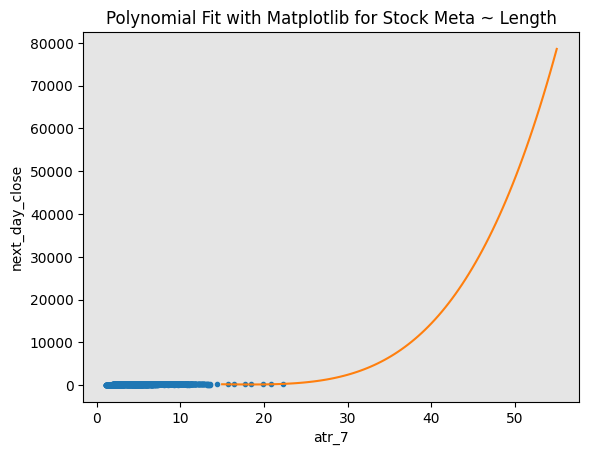

In [ ]:
# Two important variables that set as example for this model
x = stock['atr_7']
y = stock['next_day_close']

# Inside the polynomial model 'p' used to predict values of dependent based on independent values
f = np.polyfit(x, y, 4)
p = np.poly1d(f)

# Plot the polynomial fit
PlotPolly(p, x, y, 'atr_7')

# Analysis

The graph show the relationship between 2 variables: 'atr_7' and 'next_day_close'. The dots represent as actual stock prices. The blue lines represents the polynomial fit that capture the general trend of stock as 'atr_7 changes.

This suggest that the volatility of stock increases ('atr_7' value), the prices tend to decrease or show movement.


In [ ]:
y_pred

array([100.49389125,  98.99541718, 103.73844079, ..., 237.93001415,
       229.14277395, 234.43512425])

# Evaluation of Polynomial Linear Regression

In [ ]:
# Calculate predicted values using the polynomial regression model
y_pred = p(x)

# Calculate R-squared score
r_squared = r2_score(y, y_pred)
print('R-squared score:', r_squared)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print('Mean Squared Error:', mse)

R-squared score: 0.6170762448390501
Mean Squared Error: 2523.689159316617


# Analysis

The MSE was equivalent to 2523.689, indicate the squared difference between the actual and predicted stock prices.The higher MSE suggest a larger predictions error, so there's another factor aside from 'atr_7' that affecting the stock prices.

r2-score of 0.617 or 61.7% of the variation in dependent variable (next_day_close) is explained by indepdent variable ('atr_7'), which suggest that the model doesn't not explain much of variability in the data.

# Part 2: Logistic Regression

Statistical method used for binary classification task, where target variable has 2 possible outcomes. It used when dependent variable is categorical.


Note: Linear Regression - predicts continuous values,
 while Logistic Regression - is a binary classification algorithm, it requires the target variable to be categorical with two classes.

# Rigde Regression instead of Logistic Regression

(continuous values are not suitable for logictic regression)

variant of linear regression that used when the data suffers from multicollinearity (high correlation among predictor variables) or when overfitting im the model. It adds penalty term to ordinary least objective function, which helps to reduce thecomplexity of model and prevent overfitting.

In [ ]:
from sklearn.metrics import r2_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength by changing the alpha parameter
ridge_model.fit(X_train, y_train)

# Making predictions on the test set
predictions = ridge_model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, predictions)

# Calculating R-squared score
r_squared = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print('R-squared score:', r_squared)


Mean Squared Error: 1.7115637211977852
R-squared score: 0.9997318045506529


# Analysis

Our target variables are continuous that's why we used ridge regression as a substitue for the logistic.

The MSE value of approximately 1.71 indicates that, on average, the squared difference between the actual and predicted target values is 1.71 closer to actual value

R-squared score of approximately 0.9997 suggests that the Ridge regression model explains about 99.97% perfectly explain the variance in the target variable.

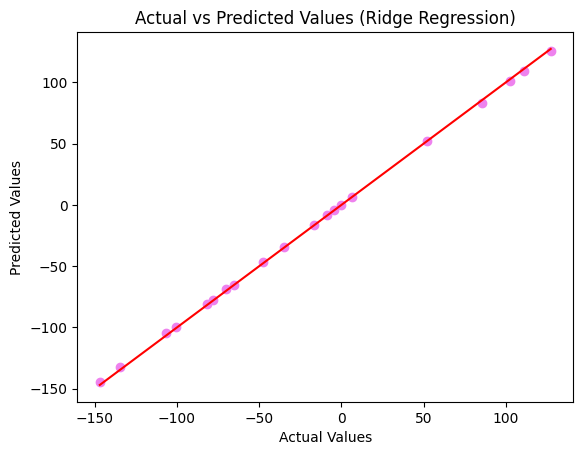

In [ ]:
# Plotting the actual vs predicted values
plt.scatter(y_test, predictions, color='violet')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.show()

#Analysis

The visual aod seems that the Actual Value was 50 and 100. Then the Predicted Values are: 100, 50, -50, -100, -150, -150. The model's predictions seem to be lower that actual in some instances and higher to others, However the Actual value of 100 was accurate. Since that all feautures are on the same scale then it capturing the true relationship between the features and target variable accurately.



# Part 3: Decision Trees

A flowchart structure used for classification or regression, where each internal node represents a test on an attribute (feature), branches represent the outcome of the test, and leaf nodes represent the class label (classification) or numerical value (regression).

Decision tree or if-else statements used to determine the best feature and decision rule for splitting data, minimizing squared error at each node.

# Installing graphiz for displaying the image

In [ ]:
!pip install graphviz

# Importing Libraries

In [8]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from IPython.display import display, Image
import graphviz

In [9]:
#data["condition"].fillna(data["condition"].mean(), inplace = True)

In [10]:
# Dependent variable
y_target = stock["next_day_close"].values

In [11]:
# 4 important variables
columns = ["open", "close", "low", "high"]
X_input = stock[list(columns)].values

In [12]:
# Creating Decision Tree Regression
regressor = DecisionTreeRegressor(max_depth=3) # depth 3 meand that tree will make split up to 3 levels deep.

#used to make prediction on new data
regressor.fit(X_input, y_target)

DecisionTreeRegressor(max_depth=3)

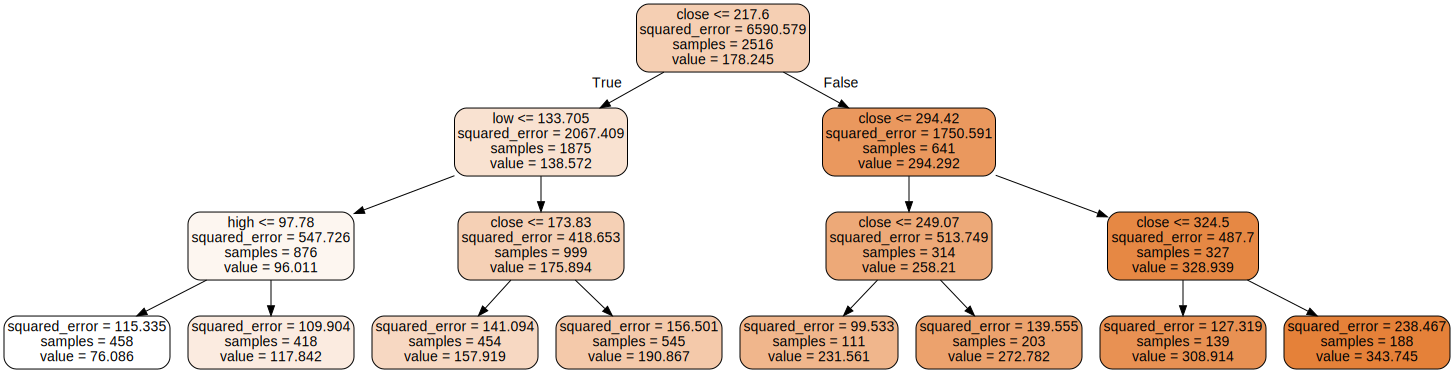

In [13]:
# exporting the train decision tree model into textual representation in DOT format which is a graph description.
dot_data = export_graphviz(regressor, out_file=None, feature_names=columns, filled=True, rounded=True)
# represent the decision tree graph from DOT data
graph = graphviz.Source(dot_data)

# set the length and width of the graph
graph.format = 'png'  # or 'pdf', 'svg', etc.
graph.render("decision_tree_graph", format='png', cleanup=True, view=True, directory=None, quiet=False, quiet_view=False) # Save the graph to a file

# Displaying the decision tree
display(graph)

# Analysis

The squared errors for specific condition and no. of samples indicates as data points that meet that condition.

For the first line the condition is met (high <=97.78), the squared error is 115.335 calculated based on 458 samples.

For the second line the condition is met (high <=97.78) is true, used in calculation 76.086

The squared errors and no of sample are calculated in different consditions for ex. "high <=97.78", low <= 133.705", and "close <=173.83" represent different rules or threshold for splitting data based on values of features.

The true condition lead to one branch of decision tree as true, false lead to another branch  as false.



# Evaluation for Decision Tree

In [14]:
# Predict the target variable using the trained model
y_pred = regressor.predict(X_input)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_target, y_pred)
print("Mean Squared Error:", mse)

# Compute R-squared (R2) score
r_squared = r2_score(y_target, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 139.11747590258972
R-squared: 0.9788914628869912


# Analysis

Since we used Decision Tree Regressor, the evaluation metrics will be MSE and R2 score.

Results suggest that the regression model has performed well, with a relatively low MSE as 139.12 and a high R2 score as 0.979 0r 97.9%. It indicates that the model's predictions are close to the actual values, and the model explains a large portion of the variability in the target variable.

Note:
*   y_test or y_pred containeed continuous values instead of dicrete class we can't used confusion matrix for that.
*  Decision Tree Classifier used for classification problems where target variable is categorical "class labels".



# Part 4: Random Forest

An ensemble learning method that combines multiple decision trees to improve prediction accuracy and prevent overfitting.


In [15]:
# Contain the values of all columns in data except 'date'
X = stock.drop(["date"],axis=1).values

In [16]:
# Removing rows with missing values
x = stock.dropna(inplace = True)

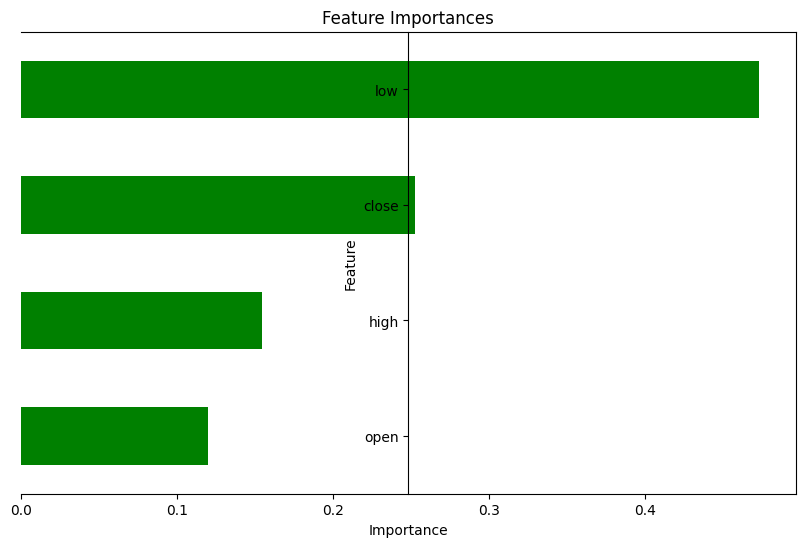

In [19]:
# Train the random forest regressor model
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Get feature importances from the trained random forest regressor model
feature_importances = regressor.feature_importances_

# Get the names of the features
feature_names = ['open','high', 'low', 'close']

# Create a Series with feature importances and their corresponding column names
model_ranks = pd.Series(feature_importances, index=feature_names, name='Importance')

# Sort feature importances
model_ranks = model_ranks.sort_values(ascending=True)

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
ax = model_ranks.plot(kind='barh', color='green')

# Set plot title and labels
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Move x-axis to the center
ax.spines['left'].set_position('center')

# Show plot
plt.show()

# Analysis:

It's very essential to know what's the important variable in the model. So it's easy to identify what features contribute the most model's predictions. Which variables have little to no impact on prediction.

We used to display the importance variable in order for us to provide insight in the relationship betweeen features and target variables that can useful for feature selection.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = stock[['open','high', 'low', 'close']]  # Independent variables
y = stock['next_day_close']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Calling the module
# 100 = parameters/ reproducibility
rf = RandomForestRegressor(n_estimators = 100, random_state=42)
rf.fit(X_train, y_train)

# Generates the predictions in given data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
import pandas as pd

# Contains predicted values of training set in y_train_pred
y_train_pred = pd.DataFrame(y_train_pred, columns =['yPredict'])
y_train_pred

,yPredict
0,337.834301
1,180.930000
2,111.489999
3,231.566498
4,167.470501
...,...
1756,175.202799
1757,275.835602
1758,127.633797
1759,148.666199


# Analysis

it's important the know the y_train_pred for evaluating the performance model on training data. By comparing the predicted values with actual values.

This information can be sued  to fine-tune the model to prevent overfitting.

In [ ]:
# Generates prediction in x_test that stored to y_test_pred
y_test_pred

array([149.75509966, 141.69479818, 111.30600024, 168.43439985,
       136.57419855, 170.65679782, 165.66380099, 330.44920589,
       151.69659998, 222.6278997 ,  83.57120116, 179.40290157,
        68.50380026,  93.79530192, 111.50920074,  82.30570015,
       287.62649971, 113.232799  , 277.64359465, 187.2568986 ,
       176.69480213, 274.51760347, 304.42720034, 200.98479955,
       130.10230006, 148.18960102,  79.59409949, 124.09210148,
       192.52709883, 177.96520099, 176.90250444, 291.49739723,
        68.67709995, 180.60070153, 218.80610069, 185.21649659,
        91.46140064, 150.74800034, 105.91259894, 165.94729936,
        79.82539921,  94.2900996 ,  95.27829986, 155.20690171,
       250.19520151, 318.29900137, 205.60779767,  76.65639989,
       170.45299855, 169.17669876, 285.3403985 , 237.19129811,
       135.43799957, 112.17849897, 163.54820015, 111.19049966,
       172.49170094, 163.82680081, 269.34699625, 107.53799987,
       309.7386973 , 163.02799984, 282.00040102, 175.11

In [ ]:
# Size of data and numbers of features.
stock.shape

(2516, 21)

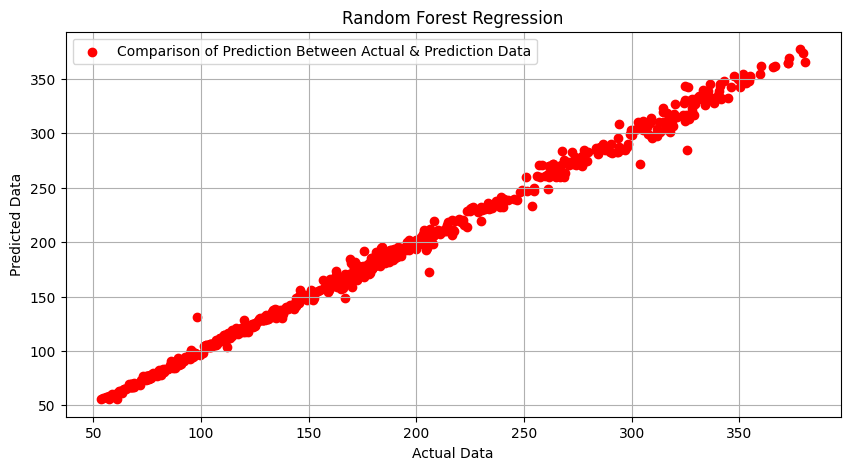

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='red', label='Comparison of Prediction Between Actual & Prediction Data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

# Analysis

The visual aid compares the actual and predicted data for random forest regression. It suggest that the model was able to predict values for the test set with accuracy.

# Evaluation for Random Forest (Actual vs. Predicted)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared for training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"Random Forest Train MSE: {mse_train:.2f}")
print(f"Random Forest Test MSE: {mse_test:.2f}")
print(f"Random Forest Train R2 Score: {r2_train:.2f}")
print(f"Random Forest Test R2 Score: {r2_test:.2f}")

Random Forest Train MSE: 22.96
Random Forest Test MSE: 19.77
Random Forest Train R2 Score: 1.00
Random Forest Test R2 Score: 1.00


# Analysis

MSE values for both training and testing datasets are relatively low, with test MSE (19.77) being slightly low than train MSE (22.96). Indicates that the model generalizes well to unseen data.

Both train and test of R2 score are equal to 1, indicates that the model explains nearly variability in data.

It suggest that the model captures the patterns in data effectively without memorizing it, allowing to make accurate predictions on new data samples (unseen data that hasn't been trained on).

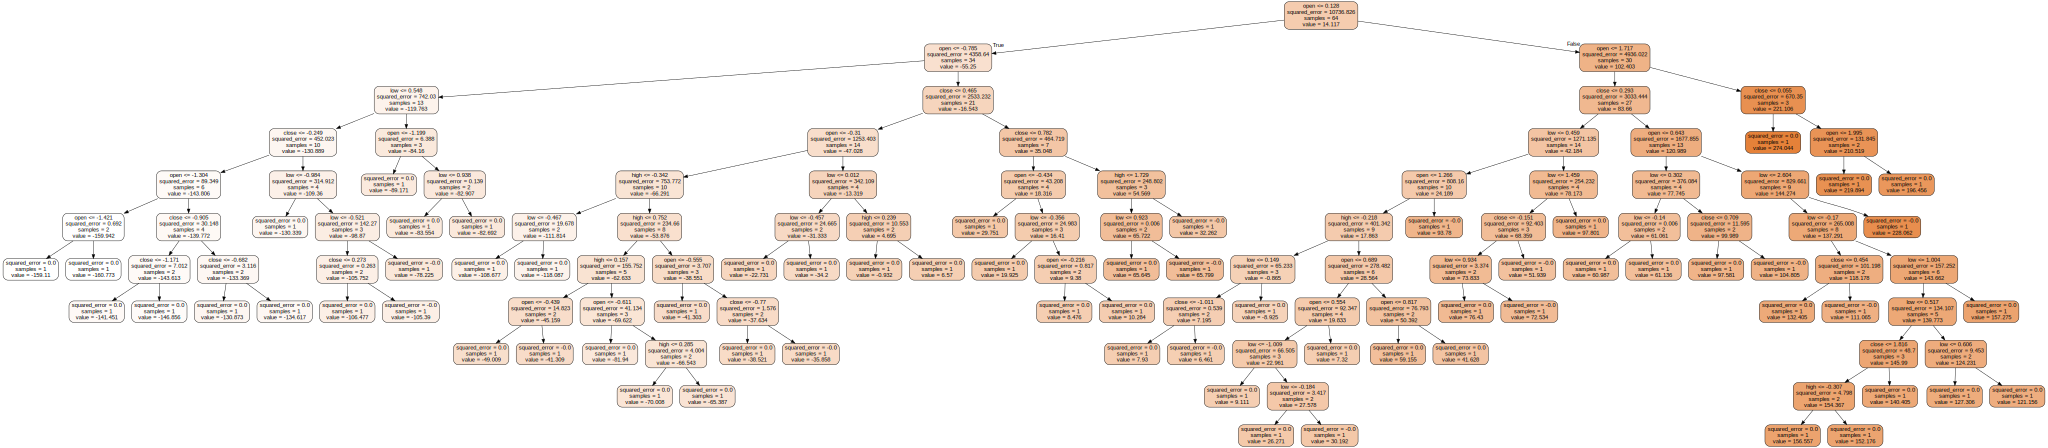

In [ ]:
# Generating a sample dataset
X, y = make_regression(n_samples=100, n_features=4, noise=0.1, random_state=42)

# Creating a random forest regressor model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model to the data
regressor.fit(X, y)

# Visualizing the decision trees in the random forest
dot_data = export_graphviz(regressor.estimators_[0],
                           out_file=None,
                           feature_names=['open', 'high', 'low', 'close'],
                           filled=True,
                           rounded=True)
graph = graphviz.Source(dot_data)
display(graph)


# Analysis

 As you can see above there's another branches, it combines multiple decision trees to imporve performance and stability of the model.  It reduces the risk of overfitting since it used to identify or remove irrelevant features in data.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared for training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"Random Forest Train MSE: {mse_train:.2f}")
print(f"Random Forest Test MSE: {mse_test:.2f}")
print(f"Random Forest Train R2 Score: {r2_train:.2f}")
print(f"Random Forest Test R2 Score: {r2_test:.2f}")

Random Forest Train MSE: 21.74
Random Forest Test MSE: 20.47
Random Forest Train R2 Score: 1.00
Random Forest Test R2 Score: 1.00


# Analysis

MSE values for both training and testing datasets are relatively low, with test MSE (20.47) being slightly low than train MSE (21.74). Indicates that the model generalizes well to unseen data.

Both train and test of R2 score are equal to 1, indicates that the model explains nearly variability in data.

It suggest that the model captures the patterns in data effectively without memorizing it, allowing to make accurate predictions on new data samples (unseen data that hasn't been trained on).

# Conslusion and Summary

In the exam we visualized different algorithms using mean squared error and R-squared scores to assess their accuracy in predicting continuous datasets, particularly stock market prices. We also examined graphs of feature importance, decision trees, and random forests to understand how they correlate with each other and influence stock market prices. It's interesting to note that we found multiple variables contributing to stock market movements rather than just one. This comprehensive approach helps us to gain insights into the complex dynamics of financial markets.